# Introduction

The statsmodels library supports linear regression by wrapping the ordinary least squares (OLS) method into a useful function. Here is an example of how to use it with sample data.

## Load libraries

In [1]:
# Math & data
import numpy as np
import pandas as pd

# Stats
import statsmodels.api as sm

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
data = pd.read_excel('bubble wrap.xlsx')
data.head()

,Name,Length (in),Width (in),Thickness (in),Total Square (in),Perforation line (in),# Sold,URL,Price ($)
0,"Yens® 3/16""x 12"" Small Bubbles Perforated 700 ...",8400,12,0.1875,100800,12.0,10000.0,https://www.ebay.com/itm/Yens-3-16-x-12-Small-...,30.99
1,"50 Foot Bubble Wrap® Roll! 3/16"" (Small) Bubbl...",600,12,0.1875,7200,12.0,NaN,https://www.ebay.com/itm/50-Foot-Bubble-Wrap-R...,6.45
2,"Super Bubble 3/16""x 12"" Wide Mailing 700 ft bu...",8400,12,0.2000,100800,NaN,3759.0,https://www.ebay.com/itm/Super-Bubble-3-16-x-1...,30.95
3,"50 Foot LARGE Bubble Wrap® Roll 12"" Wide! 1/2""...",600,12,0.5000,7200,12.0,10000.0,https://www.ebay.com/itm/50-Foot-LARGE-Bubble-...,8.19
4,"100' Bubble Wrap® Roll (SMALL) 3/16"" Bubble! 1...",1200,12,0.1875,14400,12.0,NaN,https://www.ebay.com/itm/100-Bubble-Wrap-Roll-...,9.89


# 1. Data Exploration

In [3]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Length (in),16.0,4725.00,3585.81,600.00,600.00,4200.00,8400.00,8400.00
Width (in),16.0,12.00,0.00,12.00,12.00,12.00,12.00,12.00
Thickness (in),16.0,0.24,0.11,0.19,0.19,0.19,0.19,0.50
Total Square (in),16.0,56700.00,43029.66,7200.00,7200.00,50400.00,100800.00,100800.00
Perforation line (in),14.0,12.00,0.00,12.00,12.00,12.00,12.00,12.00
# Sold,13.0,4570.92,4150.46,304.00,1018.00,2525.00,10000.00,10000.00
Price ($),16.0,22.04,12.97,6.45,8.14,21.84,31.75,39.95


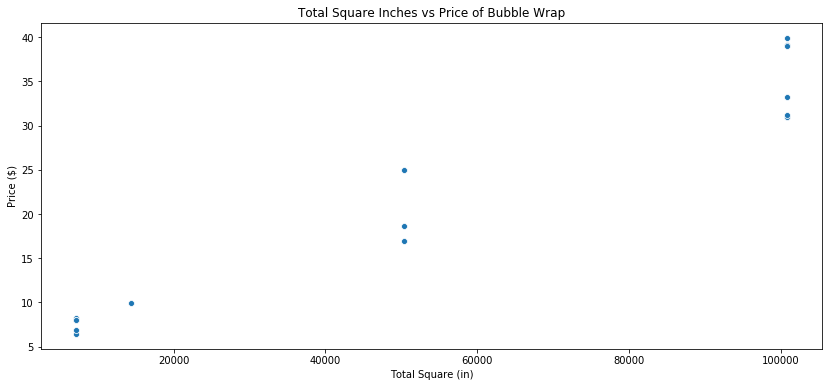

In [4]:
fig, ax = plt.subplots(figsize=(14,6))

sns.scatterplot(x=data['Total Square (in)'], y=data['Price ($)'], ax=ax)
ax.set_title('Total Square Inches vs Price of Bubble Wrap');

## Linear regression

In [6]:
x = sm.add_constant(data['Total Square (in)'])
model = sm.OLS(data['Price ($)'], x)
results = model.fit()
results.summary()

C:\Users\moogl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\moogl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     229.2
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           4.50e-10
Time:                        15:32:09   Log-Likelihood:                -40.350
No. Observations:                  16   AIC:                             84.70
Df Residuals:                      14   BIC:                             86.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.4459      1.360      4.004      0.001       2.529       8.363
Total Square (in)     0.0003   1.93e-05     15.140      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.716   Durbin-Watson:                   2.635
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.116
Skew:                           0.364   Prob(JB):                        0.572
Kurtosis:                       1.930   Cond. No.                     1.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Linear regression equation:__

$y_h = b_0 + b_1x_1$

Looking at the results above, we have: $b_1$ = 5.4459 and $b_0$ = 0.0003

Let's plot the trendline!

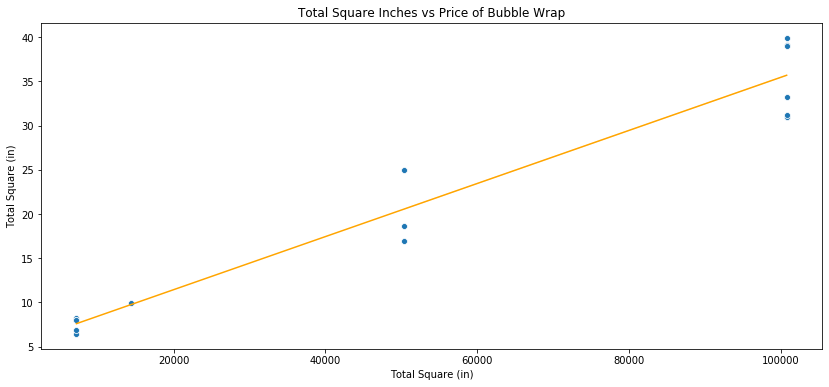

In [7]:
# Linear regression equation
y_hat = 5.4459 + 0.0003*data['Total Square (in)']

# Plot data with regression line
fig, ax = plt.subplots(figsize=(14,6))

sns.scatterplot(x=data['Total Square (in)'], y=data['Price ($)'], ax=ax)
sns.lineplot(x=data['Total Square (in)'], y=y_hat, ax=ax, color='Orange')
ax.set_title('Total Square Inches vs Price of Bubble Wrap');

## Next steps
Add another dimension to the graph: # sold. Can either do a color scale where colors are represented by the amount of items sold, or by circle sizes determined by the amount as well.